# Image Metadata Extraction in Python with exif
Author: Kenneth Leung  

<a name="top"></a>
___
## Contents
**(1)** [Install exif Package](#install)  
**(2)** [Import Dependencies](#import)  
**(3)** [View Sample Image](#view)  
**(4)** [Open image as exif Image](#open)  
**(5)** [Read and Explore Metadata](#read)  
**(6)** [Modify Metadata](#modify)  
**(7)** [Save Image with Modified Metadata](#save)  

___
- EXIF stands for exchangeable image file format. 
- **Notice**: Back up your photos before using this tool to prevent unexpected data loss that may occur through improper use of this package.
___

<a name="install"></a>
### Install exif Package

In [12]:
# !pip install Image

<a name="import"></a>
### Import Dependencies

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

import cv2
from exif import Image

In [14]:
# Define image path
folder_path = 'sample_images'
img_filename = 'image_1.jpg'
img_path = f'{folder_path}/{img_filename}'

<a name="view"></a>
### View Sample Image

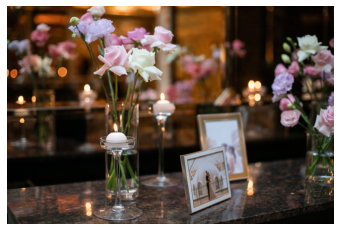

In [15]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = (20,10)
plt.axis('off')
plt.imshow(img);

<a name="open"></a>
### Open image as exif Image

In [16]:
with open(img_path, 'rb') as img_file:
    img = Image(img_file)

___
<a name="read"></a>
### Read and Explore Metadata

#### Check whether image has EXIF metadata

In [17]:
img.has_exif

True

#### Show all metadata attributes of image

In [18]:
# List all EXIF tags contained in the image
sorted(img.list_all())

['_exif_ifd_pointer',
 'aperture_value',
 'artist',
 'body_serial_number',
 'color_space',
 'compression',
 'custom_rendered',
 'datetime',
 'datetime_digitized',
 'datetime_original',
 'exif_version',
 'exposure_bias_value',
 'exposure_mode',
 'exposure_program',
 'exposure_time',
 'f_number',
 'flash',
 'focal_length',
 'focal_plane_resolution_unit',
 'focal_plane_x_resolution',
 'focal_plane_y_resolution',
 'jpeg_interchange_format',
 'jpeg_interchange_format_length',
 'lens_model',
 'lens_serial_number',
 'lens_specification',
 'make',
 'max_aperture_value',
 'metering_mode',
 'model',
 'offset_time',
 'photographic_sensitivity',
 'recommended_exposure_index',
 'resolution_unit',
 'scene_capture_type',
 'sensitivity_type',
 'shutter_speed_value',
 'software',
 'subsec_time_digitized',
 'subsec_time_original',
 'white_balance',
 'x_resolution',
 'y_resolution']

#### Show all tags (methods and attributes)

In [8]:
# List all methods and attribute tags
dir(img)

['_exif_ifd_pointer',
 '_segments',
 'aperture_value',
 'artist',
 'body_serial_number',
 'color_space',
 'compression',
 'custom_rendered',
 'datetime',
 'datetime_digitized',
 'datetime_original',
 'delete',
 'delete_all',
 'exif_version',
 'exposure_bias_value',
 'exposure_mode',
 'exposure_program',
 'exposure_time',
 'f_number',
 'flash',
 'focal_length',
 'focal_plane_resolution_unit',
 'focal_plane_x_resolution',
 'focal_plane_y_resolution',
 'get',
 'get_all',
 'get_file',
 'get_thumbnail',
 'has_exif',
 'jpeg_interchange_format',
 'jpeg_interchange_format_length',
 'lens_model',
 'lens_serial_number',
 'lens_specification',
 'list_all',
 'make',
 'max_aperture_value',
 'metering_mode',
 'model',
 'offset_time',
 'photographic_sensitivity',
 'recommended_exposure_index',
 'resolution_unit',
 'scene_capture_type',
 'sensitivity_type',
 'shutter_speed_value',
 'software',
 'subsec_time_digitized',
 'subsec_time_original',
 'white_balance',
 'x_resolution',
 'y_resolution']

#### View metadata by getting the attribute values

In [19]:
# Make of device which captured image
print(f'Make: {img.get("make")}')

# Model of device which captured image
print(f'Model: {img.get("model")}')

# Software involved in uploading and digitizing image
print(f'Software: {img.get("software")}')

# Name of photographer who took the image
print(f'Artist: {img.get("artist")}')

# Original datetime that image was taken (photographed)
print(f'DateTime (Original): {img.get("datetime_original")}')

# Details of flash function
print(f'Flash Details: {img.get("flash")}')

Make: Canon
Model: Canon EOS 6D Mark II
Software: Adobe Photoshop Lightroom Classic 9.0 (Macintosh)
Artist: MAXIXEN
DateTime (Original): 2021:09:25 12:00:35
Flash Details: Flash(flash_fired=False, flash_return=FlashReturn.NO_STROBE_RETURN_DETECTION_FUNCTION, flash_mode=FlashMode.COMPULSORY_FLASH_SUPPRESSION, flash_function_not_present=False, red_eye_reduction_supported=False, reserved=0)


#### Function to get all metadata of single image

In [20]:
def get_metadata_single(img_path):
    with open(img_path, 'rb') as img_file:
        img = Image(img_file)
        if not img.has_exif:
            print('Image does not have EXIF metadata')
        else:
            df = pd.DataFrame(columns=['attribute', 'value'])
            attr_list = img.list_all()
            
            # Add image file name
            df = df.append({'attribute': 'image_path',
                           'value': img_path}, 
                           ignore_index=True)
            
            for attr in attr_list:
                value = img.get(attr)
                dict_i = {'attribute': attr,
                         'value': value}
                df = df.append(dict_i, ignore_index=True)
            
            df.sort_values(by='attribute', inplace=True)
            df.set_index('attribute', inplace=True)
            return df

In [21]:
metadata_df = get_metadata_single(img_path)
metadata_df

,value
attribute,
_exif_ifd_pointer,244
aperture_value,2.0
artist,MAXIXEN
body_serial_number,272052002206
color_space,1
compression,6
custom_rendered,0
datetime,2021:10:28 01:23:13
datetime_digitized,2021:09:25 12:00:35


In [24]:
metadata_df.loc['lens_model'].values[0]

'EF50mm f/1.4 USM'

___
<a name="modify"></a>
### Modify Metadata

#### (i) Add attribute
- We can also assign new attributes even if the attribute is not already present in the existing image.
- Attributes that can be added must be based on the exif.Image attributes available. See this link for the list of all the EXIF tags: https://exif.readthedocs.io/en/latest/api_reference.html#image-attributes

In [25]:
# View existing value for exposure_bias_value attribute
print(f'{img.get("copyright")}')

None


In [26]:
# Add new attribute - Copyright
img.copyright = 'Kenneth Leung 2021'

# Check updated metadata
print(f'Copyright: {img.get("copyright")}')

Copyright: Kenneth Leung 2021


#### (ii) Update existing attribute
- We can update existing attributes of the image

In [27]:
# View existing value for artist attribute
print(f'Artist - Before: {img.get("artist")}')

# Update name of artist attribute
img.artist = 'Leonardo di Vinci'

# Check updated metadata
print(f'Artist - After: {img.get("artist")}')

Artist - Before: MAXIXEN
Artist - After: Leonardo di Vinci


#### (iii) Delete attribute

In [28]:
# View existing value for body_serial_number attribute
print(f'Body Serial Number - Before: {img.get("body_serial_number")}')

# Delete body_serial_number attribute
img.delete('body_serial_number')

# Check updated metadata
print(f'Body Serial Number - After: {img.get("body_serial_number")}')

Body Serial Number - Before: 272052002206
Body Serial Number - After: None


___
<a name="save"></a>
### Save Image with Modified Metadata

In [29]:
# Write image with modified EXIF metadata to an image file
with open(f'{folder_path}/modified_{img_filename}', 'wb') as new_image_file:
        new_image_file.write(img.get_file())

___
### Batch processing of metadata
Please refer to the `batch_process_metadata.py` script for batch processing (reading) of images within a specific folder